In [1]:
## Necessary libraries are imported

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import os



## Task 1

In [2]:
# Dataset is read 
df = pd.read_csv("/Users/svp/Desktop/Bank_Loan.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


No Missing Values

## Task 2 

1). ID: This attribute can be dropped.Though the data distribution is normal.

2). Age:Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median of the attribute is equal.The distribution is in considerable shape.

3). Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.

4). Income : We can clearly see data is highly left skewed.Data for less income customers is more in the sample.

5). ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample. More data from different places can be collected.

6).Family: It has 4 peaks(4 values) , families with least member is highest in the sample.

7).Mortage: This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage.

8).Securities Account : This attributes tells us that majorly cutomers are not having Security account.

9).CD account: Most of the customers dont have CDaccounts.

10).Online: Higher number of customers use online banking in the sample.

11).Credit Card: This attribute has less customers using CC in comparison to the CC users.

Relationship between the attributes:
    
Experience and age are in linear relationship. One can be dropped among them will not effect the accuracy.

In [32]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [5]:
df.isna().apply(pd.value_counts) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


No Null Values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Column 'Experience' has negative values

## Univariate Analysis of the continuous variables - 1

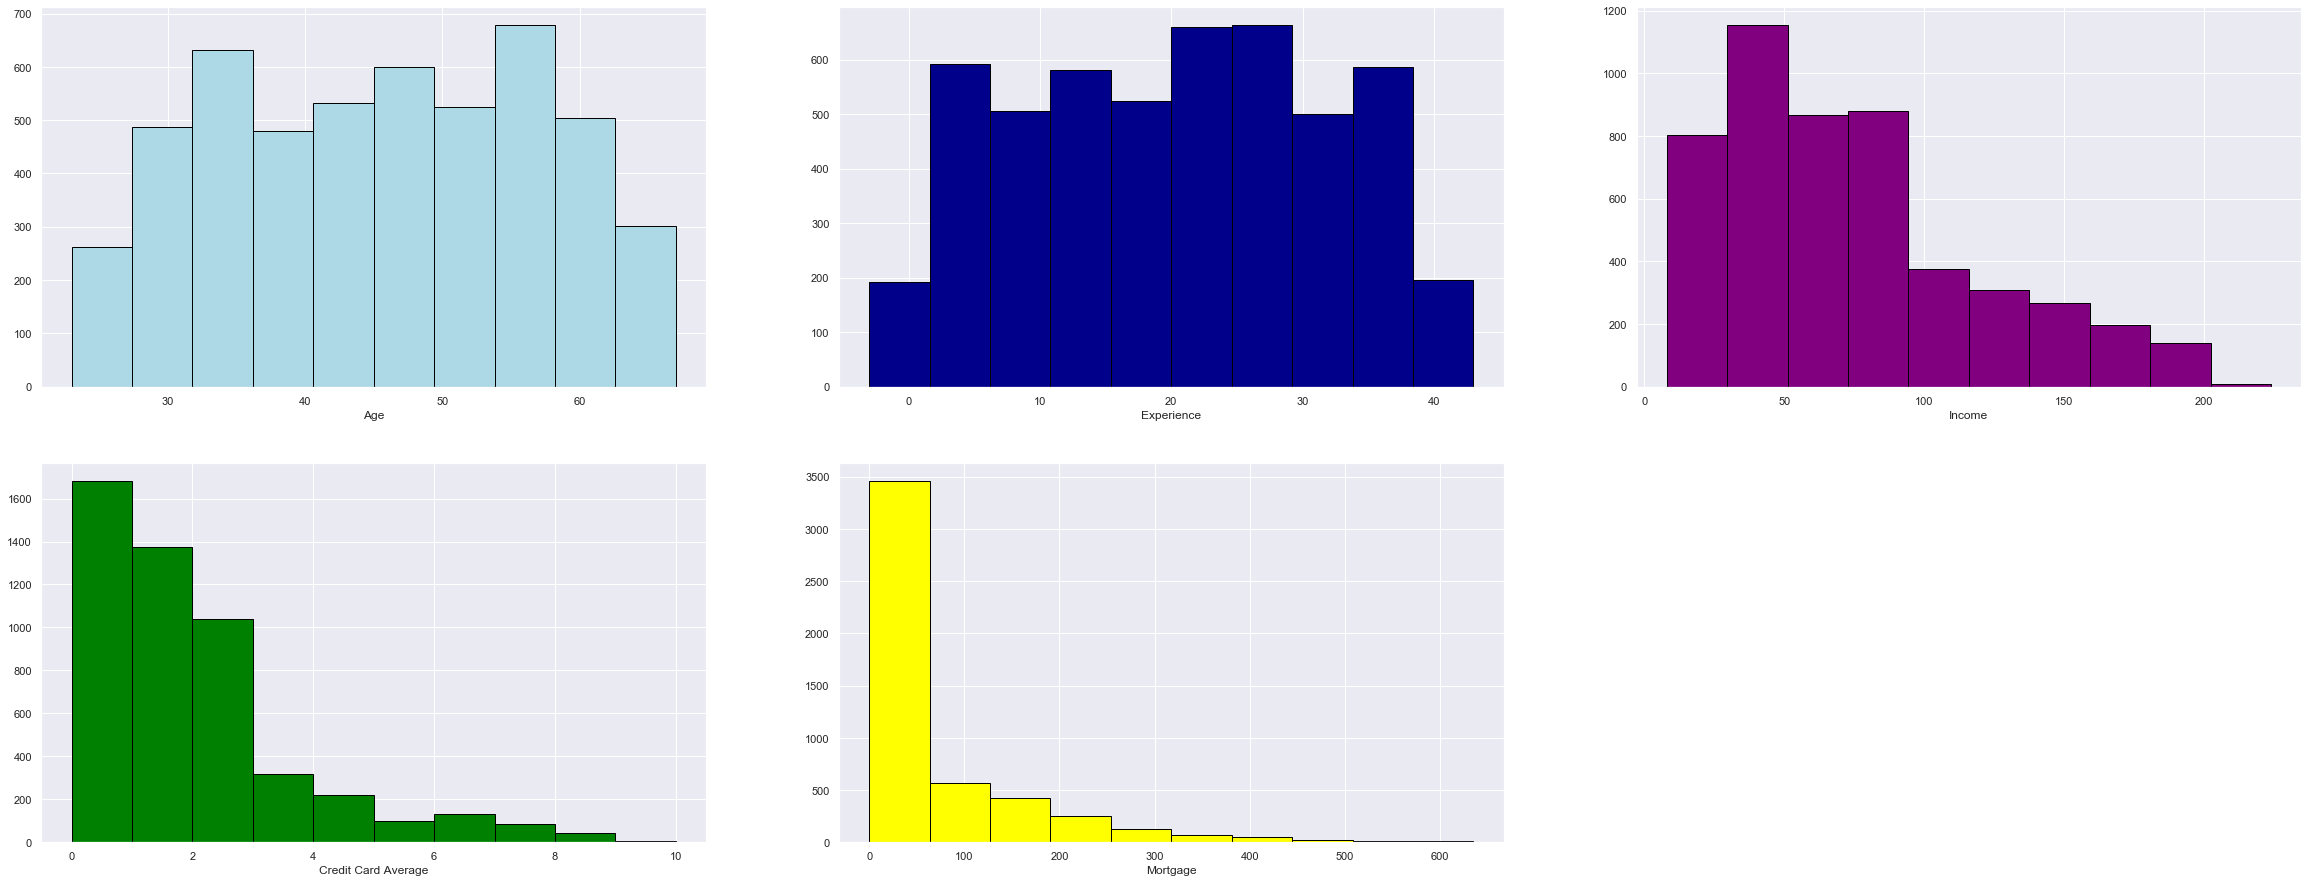

In [7]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

## Observation

 Age & Experience seems to be quiet normally distributed
 Income, CC Average & Mortgage are highly skewed

In [8]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Experience),stats.skew(df.Income),stats.skew(df.CCAvg)
                                      ,stats.skew(df.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029332
Experience,-0.026317
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


##  Observation
Age and Experience seems to be quiet Symmetrical

Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values

## Univariate Analysis of the continuous variables - 2

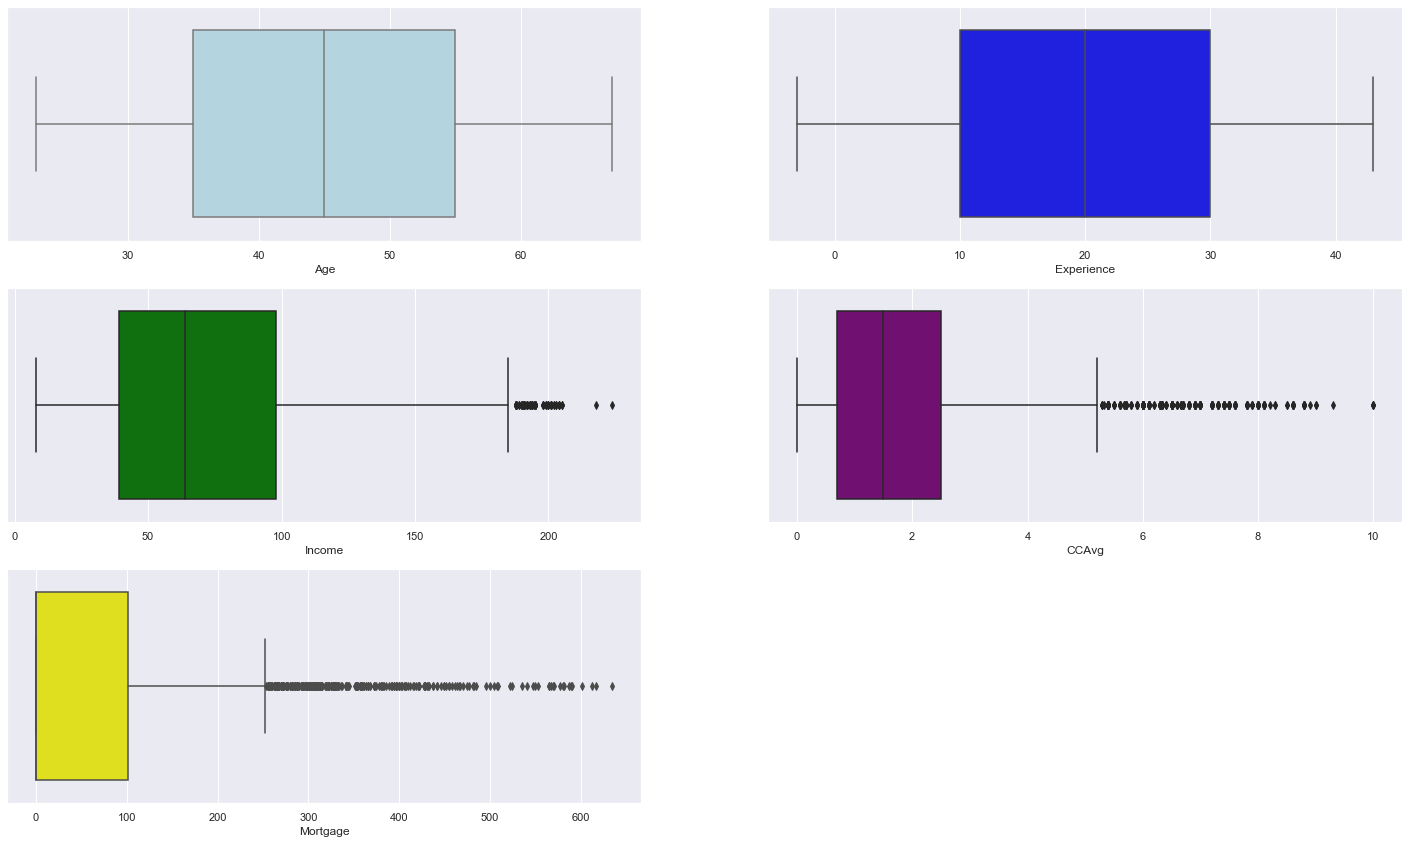

In [9]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow')

## Inference
1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

2. Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

## Univariate Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

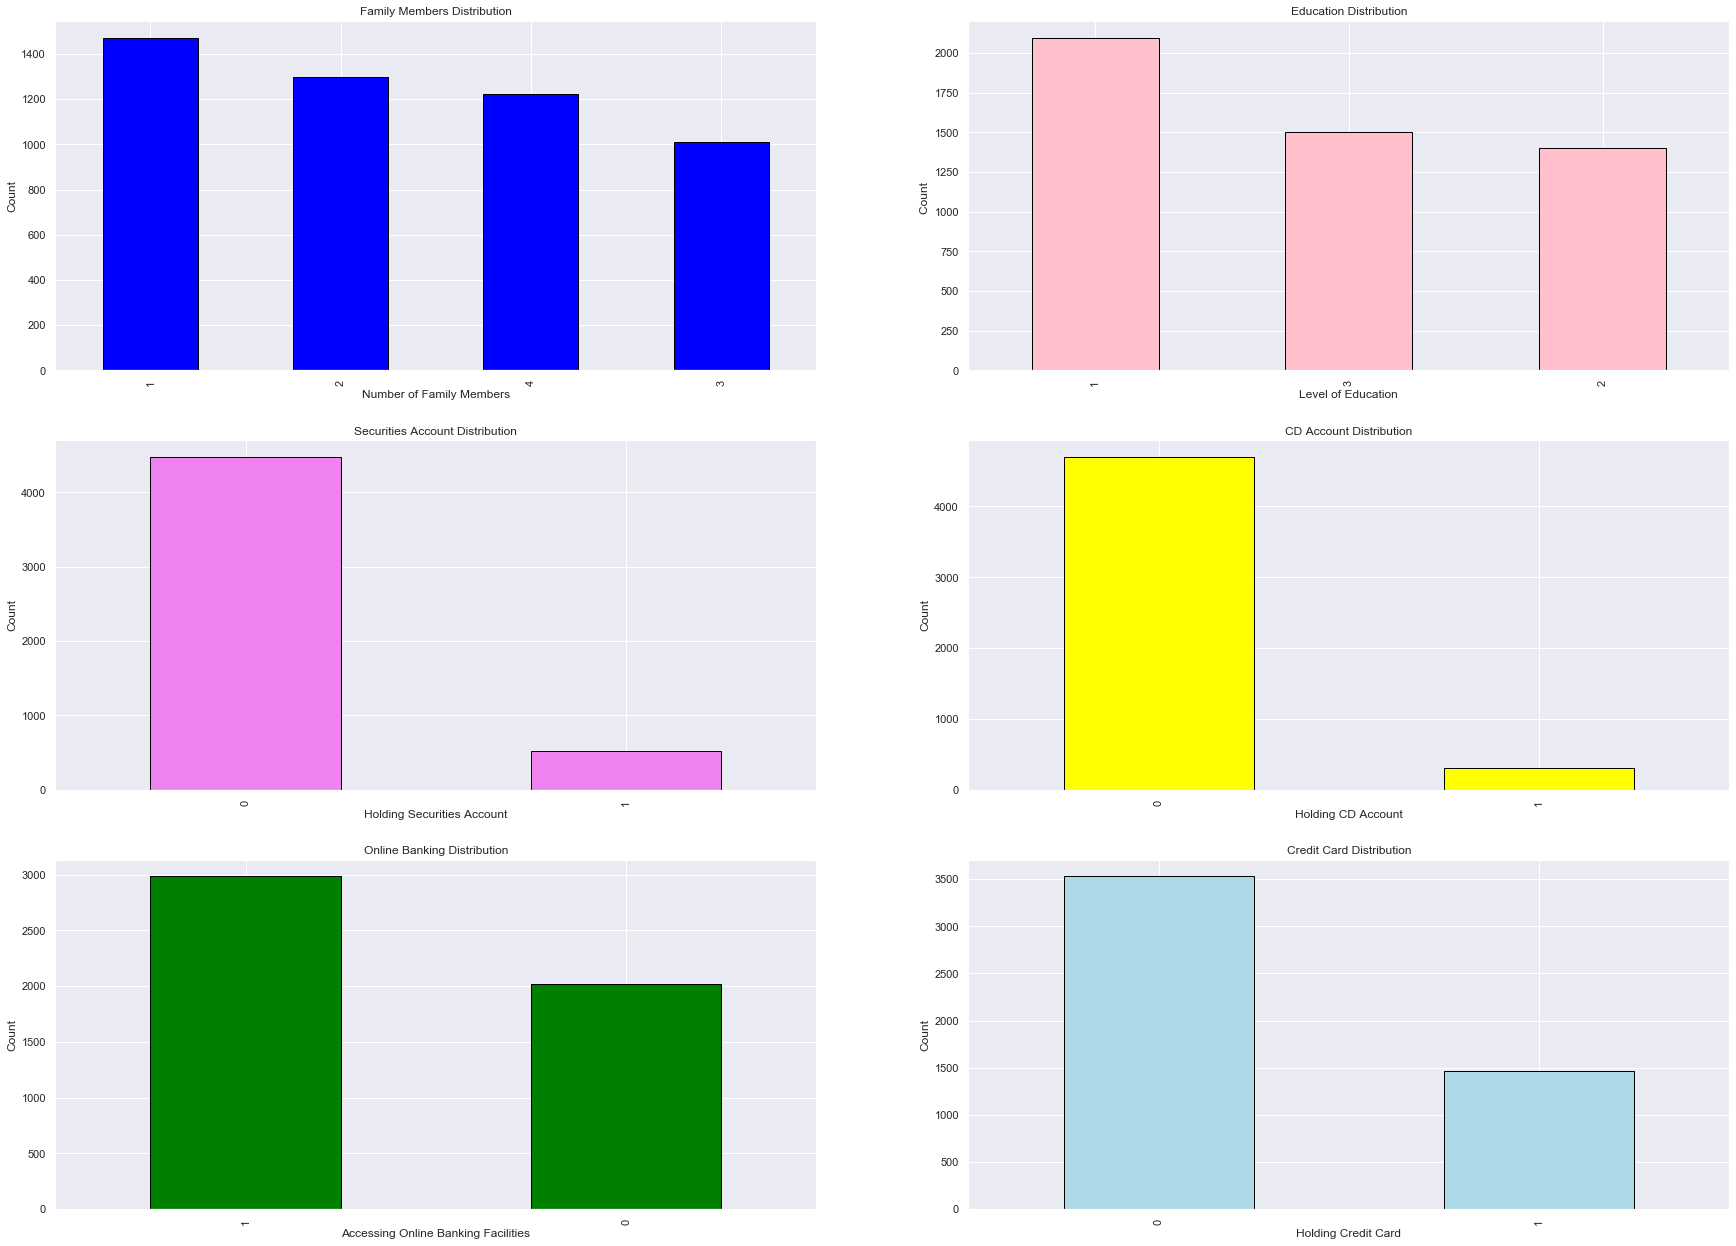

In [10]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

### Observation¶
'Age' has an association with 'Experience

## Task 3

In [11]:
df["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


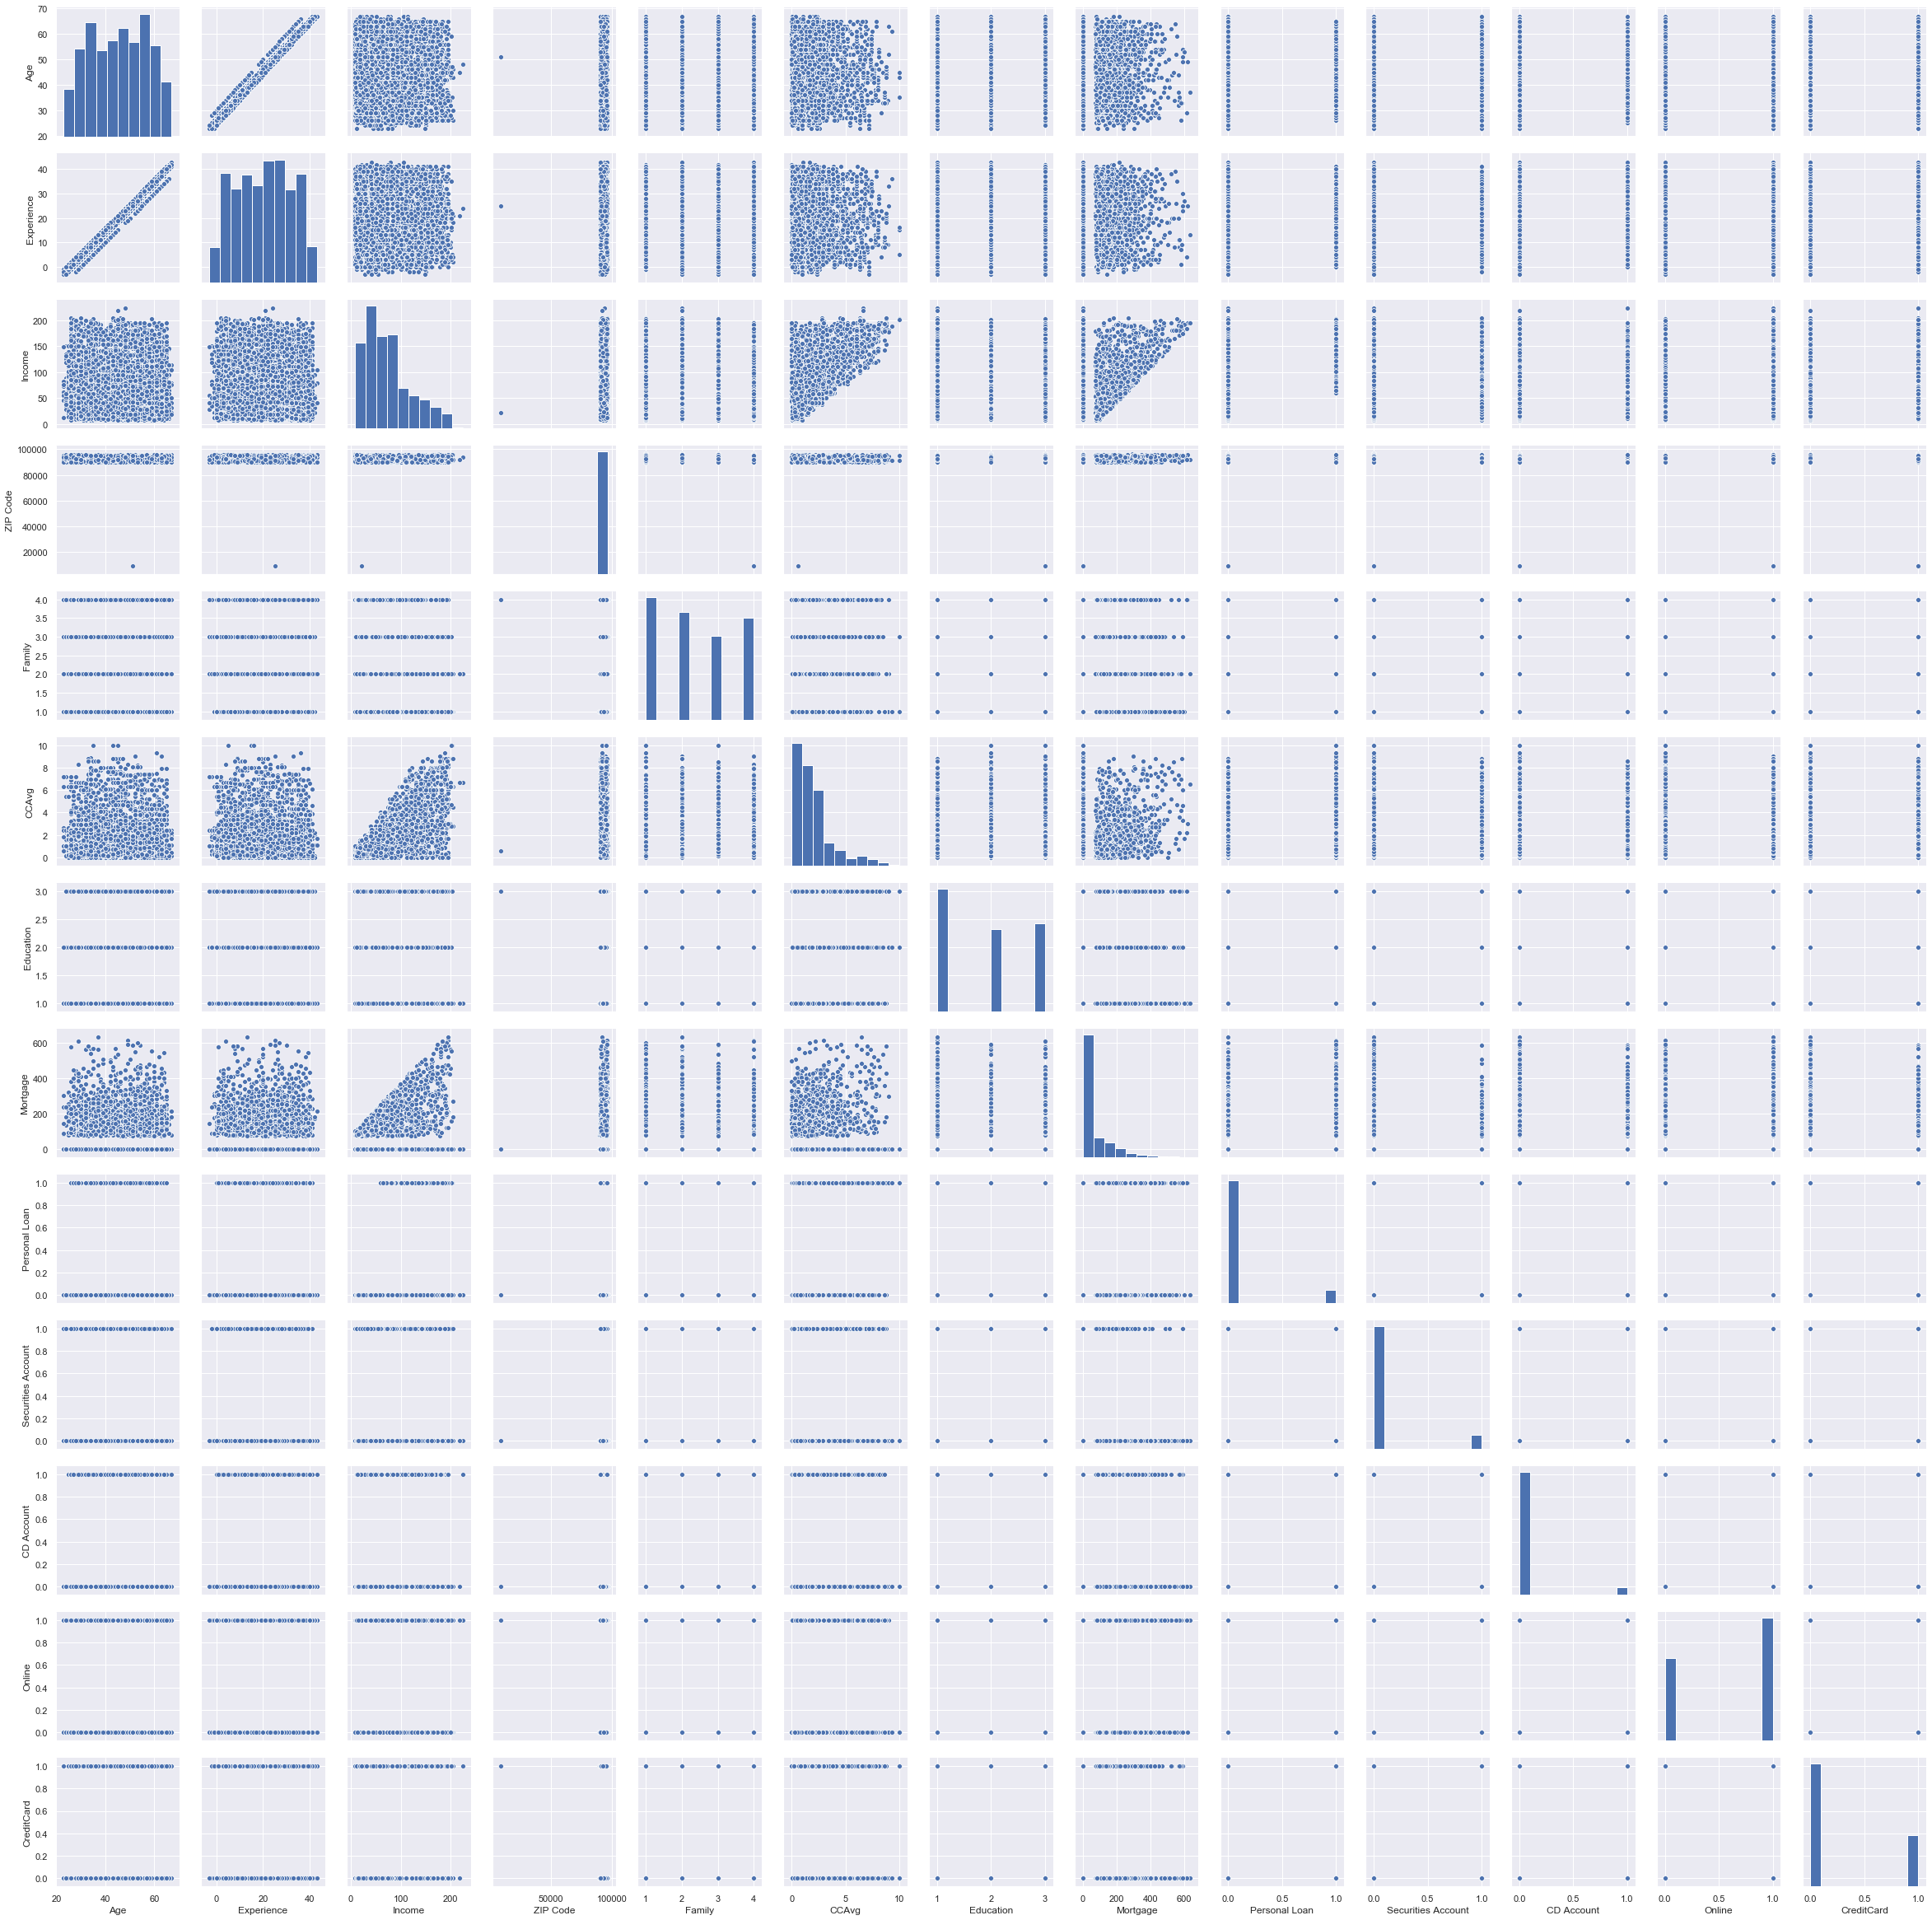

In [12]:
#Pairplot
sns.pairplot(df.iloc[:,1:])

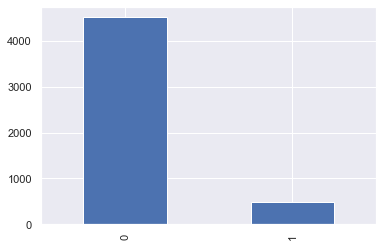

In [13]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

### Influence of few attributes on 'Personal Loan' - Target Column

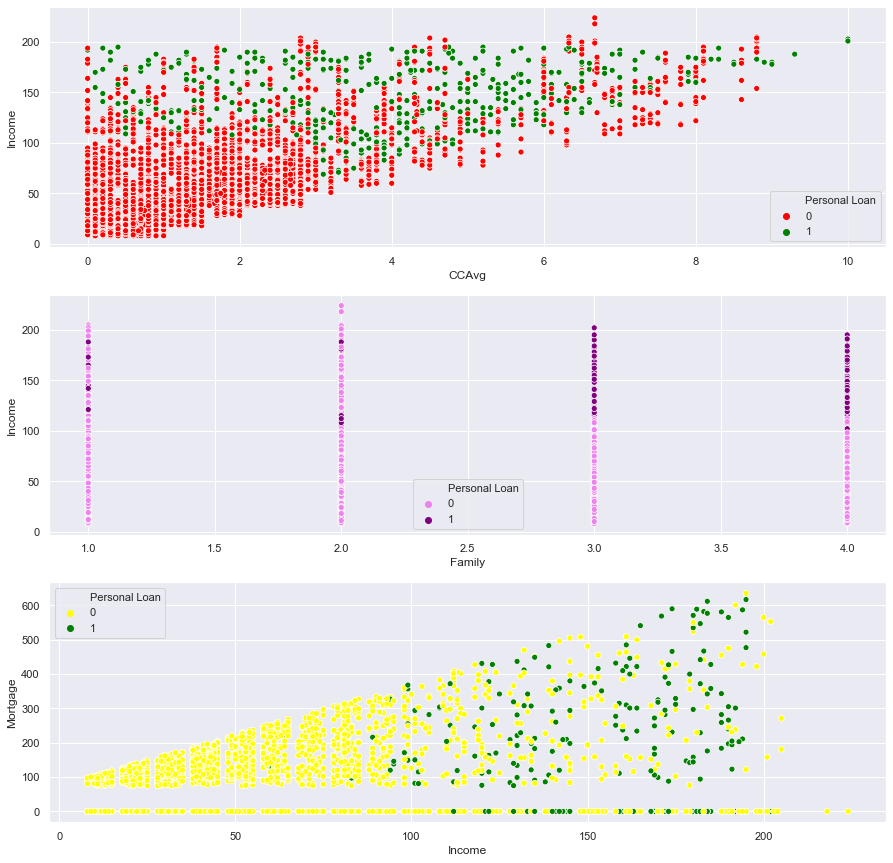

In [14]:

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green'])

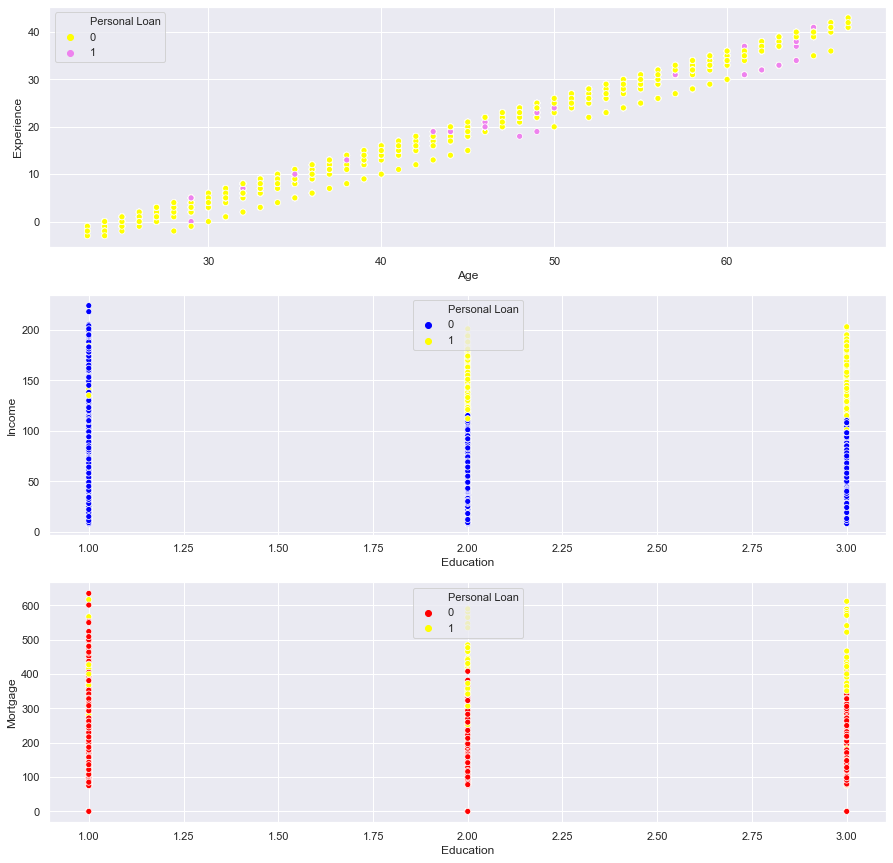

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

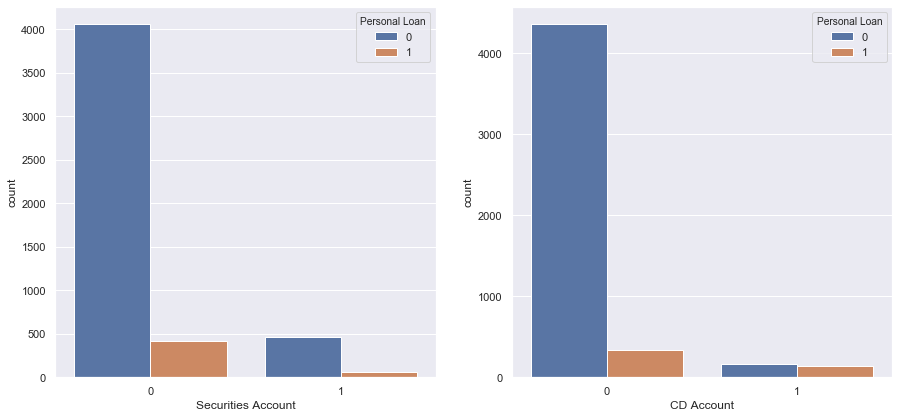

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

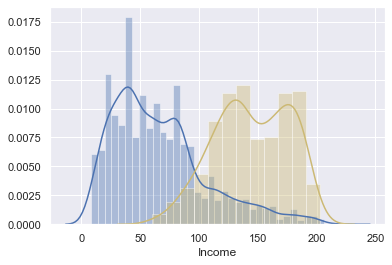

In [17]:

sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y')

In [18]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


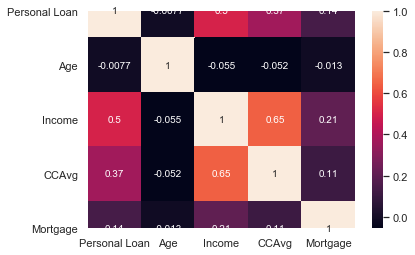

In [19]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

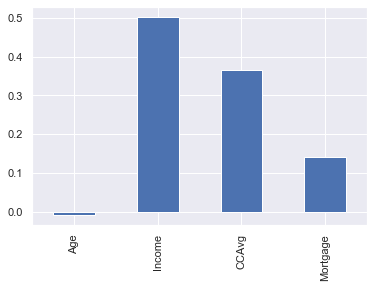

In [20]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

### Comments
The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, 
we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

## Task 4
## Data Split 70:30 Ratio

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)   
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]
train_set.head()
print("{0:0.2f}% data is in training set".format((len(X_Train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_Test)/len(df.index)) * 100))

70.00% data is in training set
29.98% data is in test set


## Task 5
## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

## Task 6
## Confusion Matrix for Logistic Regression

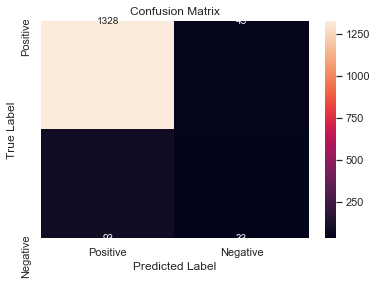

In [28]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

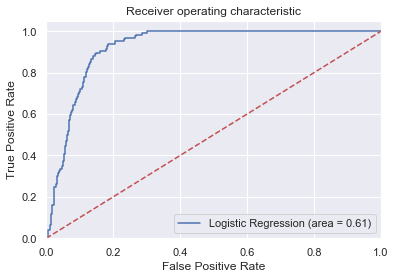

In [31]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_Test, logmodel.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, logmodel.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
# Classification Report
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.42      0.26      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.64      1499
weighted avg       0.89      0.91      0.90      1499



## Task 5
## KNN

In [58]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [59]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    
    # Predict the response
    Y_Pred = knn.predict(X_Test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [60]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9112741827885257


Text(0, 0.5, 'Misclassification Error')

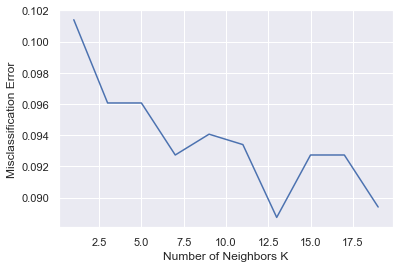

In [61]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

## Task 6
## Confusion Matrix of KNN

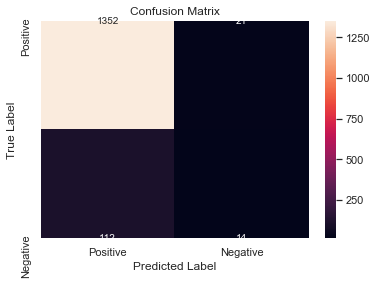

In [62]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



## Task 5
## Naive Bayes

In [64]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

## Task 6
## Confusion Matrix of Naive Bayes

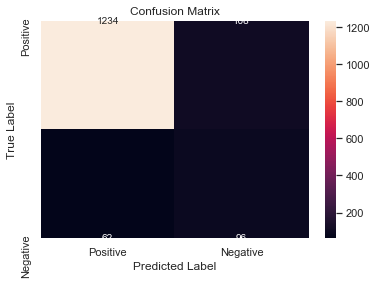

In [65]:
# Task 6
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [66]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



## Task 7
## Model Comparison

KNN: 0.898600 (0.008902)
LR: 0.908000 (0.008149)
NB: 0.885600 (0.010385)


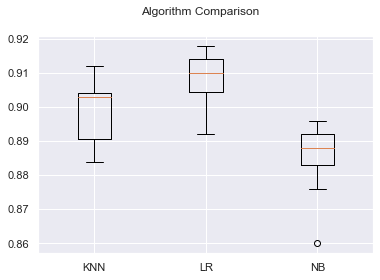

In [67]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Summary

The aim of the Thera Bank is to convert there liability customers into loan customers.
They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
Three classification algorithms were used in this study.
From the above graph , it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model